In [1]:
pip install finterstellar

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\yongw\lab\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import finterstellar as fs

In [2]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
for t in terms:
    # Set previous terms
    prev_t = fs.quarters_before(terms, t, 4)
    # Company size
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    # Value
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    # Profitability
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'ROA'] = float('nan')
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']   
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan') 
    data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'GP/E'] = float('nan') 
    # Stability
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Debt/Equity'] = float('nan')
    data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities']
    data[t]['Share Increase'] =  data[t]['Shares'] / data[prev_t]['Shares'] 
    # Efficiency
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
    data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']
    data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity']
    # Momentum
    data[t]['Price Growth'] =  data[t]['Price_M3'] / data[prev_t]['Price_M3'] 

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [3]:
# 가치투자 4대장 콤보 + 소형주
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True) 
    s5[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s6[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t])
    s[t] = fs.combine_signal(s6[t], s5[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 10.85%
Accumulated return: 180.40%
Investment period: 10.0yrs
Sharpe ratio: 0.55
MDD: -56.15%


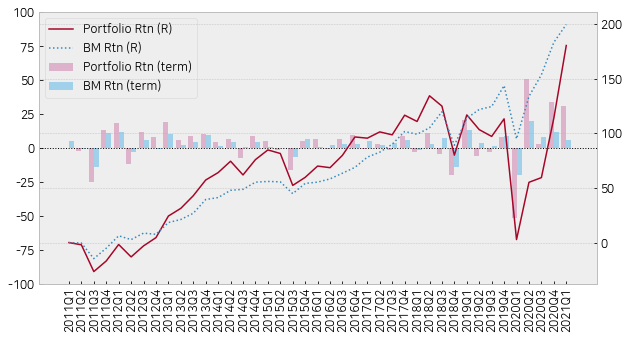

In [4]:
fs.draw_return(df)

In [5]:
# (4대장 + GP/A + 부채비율 + 유동비율) + 소형주 + 증자X
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s7 = {}
s8 = {}
s9 = {}
s10 = {}
s11 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True) 
    s5[t] = fs.fn_score(data[t], by='ROE', method='relative', floor=0, asc=False) 
    s6[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)   
    s7[t] = fs.fn_score(data[t], by='Debt/Equity', method='relative', floor=0, asc=True)
    s8[t] = fs.fn_score(data[t], by='Current Ratio', method='relative', floor=0, asc=False)
    s9[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s10[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s11[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t], s5[t], s6[t], s7[t], s8[t])
    s[t] = fs.combine_signal(s11[t], s9[t], s10[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 10.00%
Accumulated return: 159.47%
Investment period: 10.0yrs
Sharpe ratio: 0.60
MDD: -49.89%


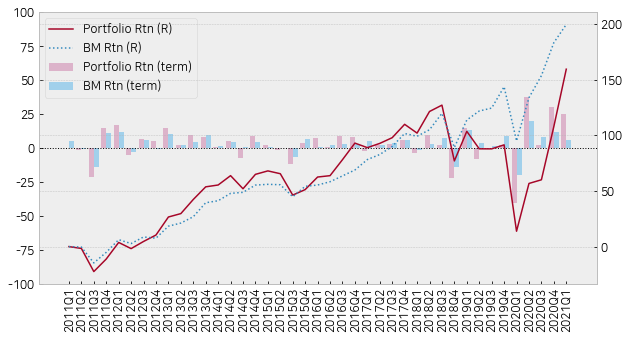

In [6]:
fs.draw_return(df)

In [7]:
# (4대장 + GP/A + 부채비율 + 유동비율) + 소형주 + 증자X + 모멘텀
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s7 = {}
s8 = {}
s9 = {}
s10 = {}
s11 = {}
s12 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True) 
    s5[t] = fs.fn_score(data[t], by='ROE', method='relative', floor=0, asc=False) 
    s6[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)   
    s7[t] = fs.fn_score(data[t], by='Debt/Equity', method='relative', floor=0, asc=True)
    s8[t] = fs.fn_score(data[t], by='Current Ratio', method='relative', floor=0, asc=False)
    s9[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s10[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s11[t] = fs.fn_filter(data[t], by='Price Growth', floor=1)
    s12[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t], s5[t], s6[t], s7[t], s8[t])
    s[t] = fs.combine_signal(s12[t], s9[t], s10[t], s11[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 6.01%
Accumulated return: 79.42%
Investment period: 10.0yrs
Sharpe ratio: 0.42
MDD: -45.61%


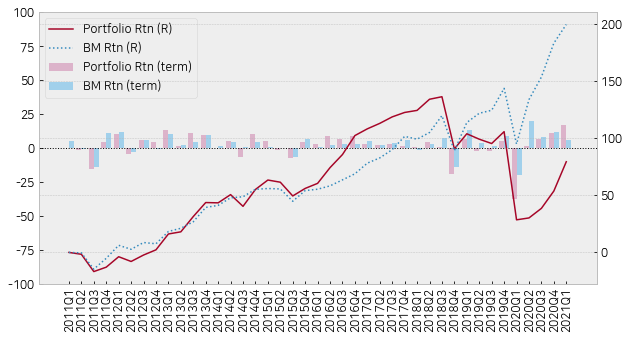

In [8]:
fs.draw_return(df)

In [9]:
# GP/A + 소형주 + 증자X
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)    
    s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s3[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 14.30%
Accumulated return: 280.93%
Investment period: 10.0yrs
Sharpe ratio: 1.10
MDD: -43.25%


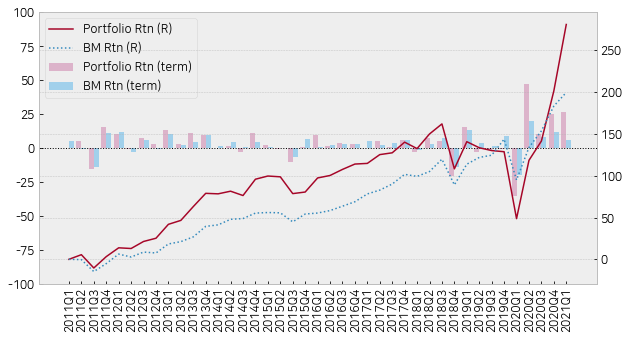

In [10]:
fs.draw_return(df)

In [11]:
# GP/A + 부채비율 + 소형주 + 증자X
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)    
    s2[t] = fs.fn_score(data[t], by='Debt/Equity', method='relative', floor=0, asc=True)
    s3[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s4[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s5[t] = fs.combine_score(s1[t], s2[t])
    s[t] = fs.combine_signal(s5[t], s3[t], s4[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 14.45%
Accumulated return: 285.96%
Investment period: 10.0yrs
Sharpe ratio: 1.20
MDD: -41.62%


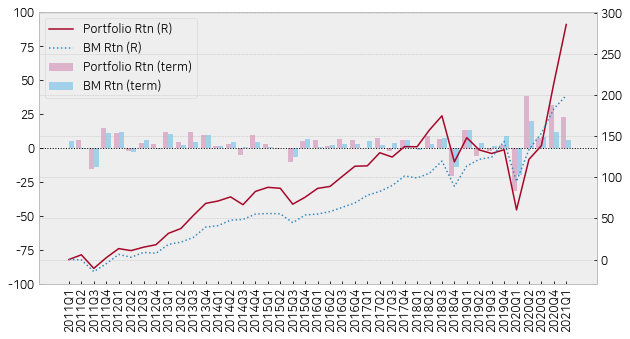

In [12]:
fs.draw_return(df)

In [13]:
# 자산회전율 + GP/A + 소형주
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_score(data[t], by='Asset Turnover', method='relative', floor=0, asc=False)   
    s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)   
    s3[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s5[t] = fs.combine_score(s1[t], s2[t])
    s[t] = fs.combine_signal(s5[t], s3[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 18.69%
Accumulated return: 455.52%
Investment period: 10.0yrs
Sharpe ratio: 1.42
MDD: -44.33%


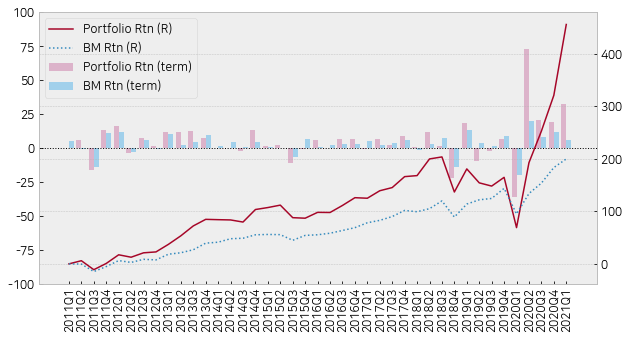

In [14]:
fs.draw_return(df)